# Data Science and Visualization (RUC F2023)

## Lecture 6: Regression

 # Logistic Regression
 
 

## 0. Importing the Required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

 ## 1. Data Loading and Preprocessing

In [8]:
df = pd.read_csv('../Data/patients.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/patients.csv'

In [ ]:
df.shape

(20, 3)

We rename the columns for the sake of convenience.

In [ ]:
df.columns = ['sha', 'toa', 'ta']

In [ ]:
df

,sha,toa,ta
0,1,1,70
1,1,1,80
2,1,1,50
3,1,0,60
4,1,0,40
5,1,0,65
6,1,0,75
7,1,0,80
8,1,0,70
9,1,0,60


## 2. Exploratory Data Analysis

Let's plot all the data points of (ta, sha):

Text(0.5, 1.0, 'All points')

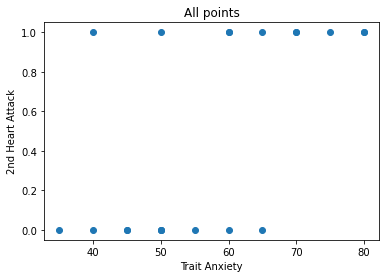

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.ta, df.sha)
plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('All points')

Next, we plot the data points of (ta, sha) for Treatment_of_Anger == 1:

Text(0.5, 1.0, 'Cases of Treatment of Anger')

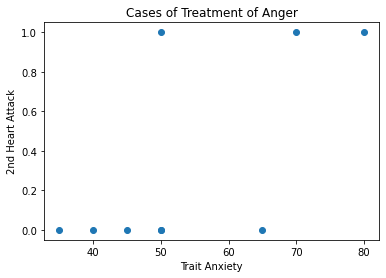

In [ ]:
data2Plot = df[['ta', 'sha']][df.toa == 1]
plt.scatter(data2Plot.ta, data2Plot.sha)
plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('Cases of Treatment of Anger')

Now we plot the data points of (ta, sha) for Treatment_of_Anger == 0:

Text(0.5, 1.0, 'Cases of w/o Treatment of Anger')

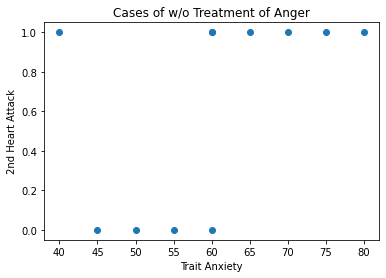

In [ ]:
data2Plot = df[['ta', 'sha']][df.toa == 0]
plt.scatter(data2Plot.ta, data2Plot.sha)
plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('Cases of w/o Treatment of Anger')

## 3. Logistic Regression for 'ta' (X) and 'sha' (y)

### 3.1 Feature selection

In [ ]:
X = df[['ta']]
y = df['sha']

### 3.2 Model Construction

In [ ]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logitRegr = LogisticRegression()

logitRegr.fit(X, y)

LogisticRegression()

### 3.3 Model Application

Here we apply the model to some new 'ta' values.

In [ ]:
for x in range(0, X.values.max()+1, 10):
    new_X = pd.DataFrame([x])
    pred_y = logitRegr.predict(new_X)
    pred_prob = logitRegr.predict_proba(new_X)

    print('ta=', x)
    print('Prediction probability:', pred_prob)
    print('Predicted class label:', pred_y[0])
    print('\r\n')
    

ta= 0
Prediction probability: [[9.99151403e-01 8.48596501e-04]]
Predicted class label: 0


ta= 10
Prediction probability: [[0.99706622 0.00293378]]
Predicted class label: 0


ta= 20
Prediction probability: [[0.98990903 0.01009097]]
Predicted class label: 0


ta= 30
Prediction probability: [[0.96588868 0.03411132]]
Predicted class label: 0


ta= 40
Prediction probability: [[0.89098735 0.10901265]]
Predicted class label: 0


ta= 50
Prediction probability: [[0.70230815 0.29769185]]
Predicted class label: 0


ta= 60
Prediction probability: [[0.40510479 0.59489521]]
Predicted class label: 1


ta= 70
Prediction probability: [[0.16427025 0.83572975]]
Predicted class label: 1


ta= 80
Prediction probability: [[0.05368991 0.94631009]]
Predicted class label: 1




## 4. Visualization

We plot the orignal data points and their predicted probabilities.

Text(0.5, 1.0, 'Logistic Regression')

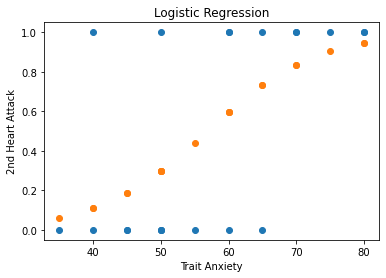

In [ ]:
plt.scatter(X, y)

plt.scatter(X, logitRegr.predict_proba(X)[:,1])

plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('Logistic Regression')

We plot the logistic curve by getting the prediction probablity for each possible value in X's range.

Text(0.5, 1.0, 'Logistic Regression')

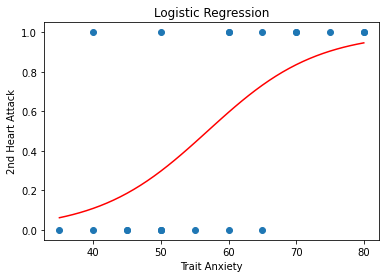

In [ ]:
x_range = range(X.values.min(), X.values.max()+1)
Xs = [i for i in x_range]
Ys = [logitRegr.predict_proba([[value]])[0][1] for value in x_range]

plt.scatter(X, y)
plt.plot(Xs, Ys, color='red')

plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('Logistic Regression')

Another way to visualize the logistic regression curve.

C:\Users\luhua\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Text(0.5, 1.0, 'Logistic Regression')

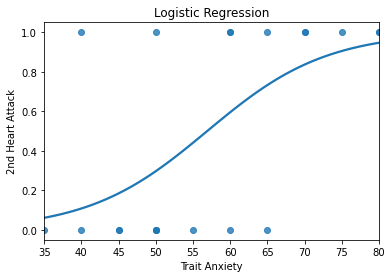

In [ ]:
import seaborn as sns
sns.regplot(x='ta', y='sha', data=df[['ta', 'sha']], logistic=True)

plt.xlabel('Trait Anxiety')
plt.ylabel('2nd Heart Attack')
plt.title('Logistic Regression')

## 5. Example of Logistic Regression for Vector Variables

In [ ]:
# Feature selection
X = df[['toa', 'ta']]
y = df['sha']

# Model construction
logitRegr2 = LogisticRegression()
logitRegr2.fit(X, y)

# Predict for a series of vectors
for x1 in range(0, 2):
    for x2 in range(0, X.values.max()+1, 10):
        new_X = pd.DataFrame([[x1, x2]])
        pred_y = logitRegr2.predict(new_X)
        pred_prob = logitRegr2.predict_proba(new_X)

        print('toa={0}, ta={1}'.format(x1, x2))
        print('Prediction probability:', pred_prob)
        print('Predicted class label:', pred_y[0])
        print('\r\n')

toa=0, ta=0
Prediction probability: [[0.99873159 0.00126841]]
Predicted class label: 0


toa=0, ta=10
Prediction probability: [[0.99578893 0.00421107]]
Predicted class label: 0


toa=0, ta=20
Prediction probability: [[0.98611439 0.01388561]]
Predicted class label: 0


toa=0, ta=30
Prediction probability: [[0.95521313 0.04478687]]
Predicted class label: 0


toa=0, ta=40
Prediction probability: [[0.86496085 0.13503915]]
Predicted class label: 0


toa=0, ta=50
Prediction probability: [[0.65796071 0.34203929]]
Predicted class label: 0


toa=0, ta=60
Prediction probability: [[0.36617063 0.63382937]]
Predicted class label: 1


toa=0, ta=70
Prediction probability: [[0.14784799 0.85215201]]
Predicted class label: 1


toa=0, ta=80
Prediction probability: [[0.04952519 0.95047481]]
Predicted class label: 1


toa=1, ta=0
Prediction probability: [[9.99180740e-01 8.19259952e-04]]
Predicted class label: 0


toa=1, ta=10
Prediction probability: [[0.99727726 0.00272274]]
Predicted class label: 0


toa=

## References (advanced)

* https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8